<a href="https://colab.research.google.com/github/HugoStigletz/Data-Analytics-Portfolio/blob/main/6_6_3_TimeDelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 6.6.3 Activity

##You are working for an environmental scientist tasked by the governor of California to determine if destructive wildfires in the state are on the rise.

"Destructive wildfires" have been defined as fires that lasted longer than one day.

The governor has requested more information about how long these fires typically burn before they are contained.

In this activity, we will continue to work with the pandas datetime data type to do these calculations and report our results.

**Warning:** This data was collected by scientists but maybe not — *ahem* — data scientists, so we'll have to do some serious data wrangling to get a good answer to this question.



#Step 1: Download and save the `CA_wildfires.csv` data set from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `CA_wildfires.csv` data set by running the following code block 

* When prompted, navigate to and select the `CA_wildfires.csv` data set where you saved it on your computer.

In [ ]:
#Step 2

from google.colab import files
CA_wildfires = files.upload()

Saving CA_wildfires.csv to CA_wildfires (1).csv


#Step 3: Import necessary packages
  * Import `pandas` as `pd`
  * import `matplotlib.pyplot` as `plt`
  * Import `numpy` as `np`

In [1]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `Fires`
* Print the first five observations of `Fires`.  Note the kinds of data it contains.

In [2]:
#Step 4
Fires = pd.read_csv('/content/6.6.2 & 6.6.3 CA_wildfires.csv')
Fires.head(5)


,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,OWNER_DESCR,STATE,COUNTY
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1400.0,USFS,CA,3.0
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1200.0,USFS,CA,3.0
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,2453299.5,295.0,1000.0,USFS,CA,5.0
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,2453295.5,291.0,1800.0,USFS,CA,17.0
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,2453499.5,129.0,1330.0,STATE OR PRIVATE,CA,3.0


#Step 5: Print the first five observations of `DISCOVERY_DOY` 
* Why is it so hard to convert from the day of the year to the month and date of the year?   

In [3]:
#Step 5

Fires.head(5)


,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,OWNER_DESCR,STATE,COUNTY
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1400.0,USFS,CA,3.0
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1200.0,USFS,CA,3.0
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,2453299.5,295.0,1000.0,USFS,CA,5.0
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,2453295.5,291.0,1800.0,USFS,CA,17.0
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,2453499.5,129.0,1330.0,STATE OR PRIVATE,CA,3.0


#Step 5: 

Answer: 

#Step 6: Combine the `FIRE_YEAR` and `DISCOVERY_DOY` columns into a single column containing the discovery date in a human-readable format
* This is tricky but really illustrates the power of pandas datetimes.  Your instructor will help you walk through this calculation.
* Combine the data in `FIRE_YEAR` and `DISCOVERY_DOY` so that it is in the format `%Y%j` (where %Y represents the year and the %j represents the day of the year).  Assign the results to the variable `DISCOVERY_DATE_HR_` 
* Use `pd.to_datetime` with `format = %Y%j` to convert `DISCOVERY_DATE_HR_` to a pandas datetime, and assign the results to the variable `DISCOVERY_DATE_HR`
* Print the first five observations of `DISCOVERY_DATE_HR`




In [ ]:
## This is the idea behind step 6
YYYY365
2004000 + 180 =2004180

In [4]:
#Step 6
Fires['DISCOVERY_DATE_HR_'] = Fires['FIRE_YEAR'] * 1000 + Fires['DISCOVERY_DOY']

Fires['DISCOVERY_DATE_HR'] = pd.to_datetime(Fires['DISCOVERY_DATE_HR_'], format='%Y%j')

Fires['DISCOVERY_DATE_HR'].head()


0   2004-06-28
1   2004-06-28
2   2004-10-06
3   2004-10-13
4   2005-05-06
Name: DISCOVERY_DATE_HR, dtype: datetime64[ns]

#Step 7: Calculate the frequency of fires by the month they were discovered
* Use `Fires['DISCOVERY_DATE'].dt.month` to extract the month from `DISCOVERY_DATE`.  Assign the results to the variable `DISCOVERY_MONTH`
* Calculate the frequency of months using `.value_counts()` and save the results as a pandas DataFrame called `Fires_by_month`
* Use `.reset_index(inplace=True)` to make the index (which identifies the month) into a column of the DataFrame.
* Rename the DataFrame columns using `Fires_by_month.columns = ['MONTH','FIRE_COUNT']`





In [5]:
Fires.columns

Index(['SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR', 'FIRE_SIZE', 'LONGITUDE',
       'LATITUDE', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'CONT_TIME', 'OWNER_DESCR', 'STATE', 'COUNTY', 'DISCOVERY_DATE_HR_',
       'DISCOVERY_DATE_HR'],
      dtype='object')

In [6]:
#Step 7 We made a new column that identifies the month a fire was dicovered
Fires['DISCOVERY_MONTH'] = Fires['DISCOVERY_DATE_HR'].dt.month

Fires.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,OWNER_DESCR,STATE,COUNTY,DISCOVERY_DATE_HR_,DISCOVERY_DATE_HR,DISCOVERY_MONTH
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1400.0,USFS,CA,3.0,2004180,2004-06-28,6
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1200.0,USFS,CA,3.0,2004180,2004-06-28,6
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,2453299.5,295.0,1000.0,USFS,CA,5.0,2004280,2004-10-06,10
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,2453295.5,291.0,1800.0,USFS,CA,17.0,2004287,2004-10-13,10
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,2453499.5,129.0,1330.0,STATE OR PRIVATE,CA,3.0,2005126,2005-05-06,5


In [7]:
pd.DataFrame(Fires['DISCOVERY_MONTH'].value_counts())
## We count all the reported fire from our new column in the dataset

,DISCOVERY_MONTH
7,1607
8,1558
9,851
6,797
10,355
5,272
11,93
4,75
3,63
1,44


In [8]:
Fires_by_month = pd.DataFrame(Fires['DISCOVERY_MONTH'].value_counts())

In [10]:
Fires_by_month.reset_index(inplace=True)

In [11]:
Fires_by_month.columns = ['MONTH','FIRE_COUNT']

Fires_by_month

,MONTH,FIRE_COUNT
0,7,1607
1,8,1558
2,9,851
3,6,797
4,10,355
5,5,272
6,11,93
7,4,75
8,3,63
9,1,44


#Step 8: Use the `Fires_by_month` DataFrame to create a barplot of the number of fires discovered during each month of the year
* Use `plt.bar()` to create the figure.
* Plot `MONTH` on the x-axis.
* Plot `FIRE_COUNT` on the y-axis.
* Title the plot `Number of Destructive Wildfires in California by Month: 1992 - 2015`
* Add a y-axis label that reads `Number of Fires`
* Add an x-axis label that reads `Month`
* Add tick labels on the x-axis showing the name of each month (this has been done for you).




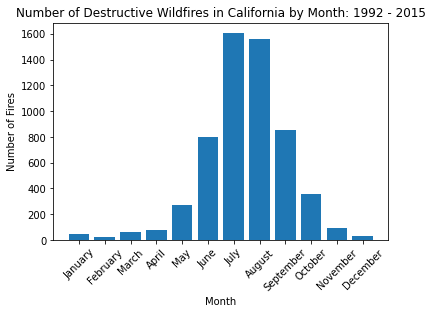

In [12]:
#Step 8

#Insert barplot code here
plt.bar(Fires_by_month['MONTH'], Fires_by_month['FIRE_COUNT'])
plt.ylabel('Number of Fires')
plt.xlabel('Month')
plt.title('Number of Destructive Wildfires in California by Month: 1992 - 2015')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'], rotation=45)
plt.show()


#Step 9: Print and view the discovery and containment date details 
* `DISCOVERY_DATE` and `CONT_DATE` are not human readable, but they are useful for calculating the length the fire lasted before it was extinguished.  Calculate `FIRE_LENGTH` by subtracting `DISCOVERY_DATE` from `CONT_DATE`
* Print `Fires[['FIRE_YEAR', 'DISCOVERY_DATE',	'DISCOVERY_DOY', 'CONT_DATE',	'CONT_DOY', 'FIRE_LENGTH']].head()`  
* Note that the difference between `DISCOVERY_DOY` and `CONT_Date` is equal to the `FIRE_LENGTH` in each of the first five records.




In [13]:
#Step 9
Fires['FIRE_LENGTH'] = Fires['CONT_DATE'] - Fires['DISCOVERY_DATE']

Fires[['FIRE_YEAR', 'DISCOVERY_DATE',	'DISCOVERY_DOY', 'CONT_DATE',	'CONT_DOY', 'FIRE_LENGTH']].head() 



,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_LENGTH
0,2004,2453184.5,180,2453189.5,185.0,5.0
1,2004,2453184.5,180,2453189.5,185.0,5.0
2,2004,2453284.5,280,2453299.5,295.0,15.0
3,2004,2453291.5,287,2453295.5,291.0,4.0
4,2005,2453496.5,126,2453499.5,129.0,3.0


#Step 10: Take a closer look at what happens when a fire burns for longer than a year 
* Print the records from `Fires` where `FIRE_LENGTH` > 365.
* In these cases, would subtracting `DISCOVERY_DOY` from `CONT_DOY` give you the correct number of days between the discovery and containment of the fire?




In [14]:
#Step 10
Fires[Fires['FIRE_LENGTH'] > 365]


,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,OWNER_DESCR,STATE,COUNTY,DISCOVERY_DATE_HR_,DISCOVERY_DATE_HR,DISCOVERY_MONTH,FIRE_LENGTH
3184,Fort Yuma Agency,2004,0.1,-114.625000,32.730300,2453027.5,23,800.0,9,Miscellaneous,2453401.5,31.0,1600.0,BIA,CA,NaN,2004023,2004-01-23,1,374.0
3759,Yosemite National Park,2000,120.0,-119.522800,37.658900,2451763.5,220,1600.0,1,Lightning,2453644.5,274.0,1800.0,NPS,CA,NaN,2000220,2000-08-07,8,1881.0
3872,Grasslands Wildlife Management Area,1999,0.5,-120.860325,37.309539,2451378.5,200,1100.0,5,Debris Burning,2455031.5,200.0,1200.0,OTHER FEDERAL,CA,NaN,1999200,1999-07-19,7,3653.0
3873,Grasslands Wildlife Management Area,1999,0.5,-120.934950,37.078344,2451345.5,167,1300.0,5,Debris Burning,2454998.5,167.0,1430.0,MISSING/NOT SPECIFIED,CA,NaN,1999167,1999-06-16,6,3653.0
3874,Pixley National Wildlife Refuge,1999,0.1,-119.276954,35.899314,2451401.5,223,1400.0,9,Miscellaneous,2455054.5,223.0,1415.0,OTHER FEDERAL,CA,NaN,1999223,1999-08-11,8,3653.0
3875,Pixley National Wildlife Refuge,1999,0.5,-119.294765,35.899284,2451370.5,192,1815.0,9,Miscellaneous,2455023.5,192.0,1830.0,OTHER FEDERAL,CA,NaN,1999192,1999-07-11,7,3653.0
3886,Grasslands Wildlife Management Area,2002,0.1,-120.753342,37.048126,2452529.5,255,645.0,3,Smoking,2454355.5,255.0,715.0,FWS,CA,NaN,2002255,2002-09-12,9,1826.0
3892,San Diego National Wildlife Refuge,2004,0.4,-116.888889,32.710556,2453343.5,339,1430.0,5,Debris Burning,2454804.5,339.0,1515.0,PRIVATE,CA,NaN,2004339,2004-12-04,12,1461.0
3902,Coachella Valley National Wildlife Refuge,2008,0.1,-116.301000,33.798000,2454514.5,49,2130.0,3,Smoking,2454880.5,49.0,2130.0,OTHER FEDERAL,CA,NaN,2008049,2008-02-18,2,366.0
3904,San Diego National Wildlife Refuge,2008,0.1,-116.824000,32.669000,2454493.5,28,1430.0,9,Miscellaneous,2454859.5,28.0,1445.0,FWS,CA,NaN,2008028,2008-01-28,1,366.0


#Step 10 

Answer: 

#Step 11: Calculate the summary statistics for `FIRE_LENGTH`
* Use `.describe()` to calculate the mean and five-number summary.
* 50% of fires lasted between what number of days?
* What was the length of the longest fire?
 



In [ ]:
#Step 11

Fires['FIRE_LENGTH'].describe()


count    5774.000000
mean       14.993765
std       106.476873
min         2.000000
25%         2.000000
50%         3.000000
75%         8.000000
max      3653.000000
Name: FIRE_LENGTH, dtype: float64

#Step 11: 

Answer: 

#Step 12: Create a histogram displaying the distribution of fire burn time.
* A few fires burned for a very long time.  We will exclude outliers with a burn time of 100 days or longer so that we can better see the distribution of the bulk of the data.
* Create a new DataFrame called `Fires_LT_100` that contains only records of fires where `FIRE_LENGTH < 100` 
* Use `plt.hist()` to create the figure.
* Plot `FIRE_LENGTH` on the x-axis.
* Title the plot `Days Between Discovery and Containment: Destructive Wildfires in California by Month: 1992 - 2015`
* Add a y-axis label that reads `Number of Fires`
* Add an x-axis label that reads `Days of Burn Time`


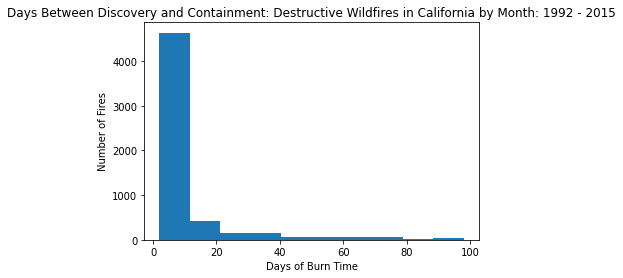

In [16]:
#Step 12
Fires_LT_100 = Fires[Fires['FIRE_LENGTH'] < 100]

plt.hist(Fires_LT_100['FIRE_LENGTH'])
plt.ylabel('Number of Fires')
plt.xlabel('Days of Burn Time')
plt.title('Days Between Discovery and Containment: Destructive Wildfires in California by Month: 1992 - 2015')
plt.show()

#Step 13: Identify the date five days before each fire was discovered
A researcher on your team hypothesizes that the humidity before a fire breaks out is related to the severity of the fire.  We want to identify the date five days before the fire was discovered so that researchers can collect data on the humidity for that day.  
* Create a `Timedelta` of five days using `pd.Timedelta` 
* Subtract the `Timedelta` from `Fires['DISCOVERY_DATE_HR']`
* Assign the results to `Fires['5D_BEFORE_DISCOVERY']`

In [17]:
#Step 13
Fires['5D_BEFORE_DISCOVERY'] = Fires['DISCOVERY_DATE_HR'] - pd.Timedelta(5, unit='D')

In [18]:
Fires.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,STATE,COUNTY,DISCOVERY_DATE_HR_,DISCOVERY_DATE_HR,DISCOVERY_MONTH,FIRE_LENGTH,FIRE_LENGTH_INT,FIRE_LENGTH_TD,CONT_DATE_HR,5D_BEFORE_DISCOVERY
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,...,CA,5.0,2004280,2004-10-06,10,15.0,15,15 days,2004-10-21,2004-10-01
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,...,CA,17.0,2004287,2004-10-13,10,4.0,4,4 days,2004-10-17,2004-10-08
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,...,CA,3.0,2005126,2005-05-06,5,3.0,3,3 days,2005-05-09,2005-05-01


#Step 14: Determine the date when each fire was contained    
This is a tricky bit of data wrangling, and your instructor will help walk you through it.  The goal is to convert the `FIRE_LENGTH` variable we created earlier into a `Timedelta` data type and then add that `Timedelta` to `DISCOVERY_DATE` to get the containment date.
  * Change the data type of `FIRE_LENGTH` from `float` to `int64` using `.apply(np.int64)`.  Name the resulting variable `FIRE_LENGTH_INT` and add it to the `Fires` DataFrame.  **Note:** There are other ways to accomplish this task.  
  * Use a lambda function to convert each element of `FIRE_LENGTH_INT` into a `Timedelta` with `unit='D'`.  Name the results `FIRE_LENGTH_TD` and add it to the `Fires` DataFrame.
  * Add the `FIRE_LENGTH_TD` column in `Fires` to the `DISCOVERY_DATE_HR` column and name the resulting column `CONT_DATE_HR`  
  * Print the first 20 observations of `Fires[['DISCOVERY_DATE_HR', 'FIRE_LENGTH_TD', 'CONT_DATE_HR']]` and do a spot-check of the date calculations.  Do they appear correct?

In [19]:
Fires['FIRE_LENGTH_INT'] = Fires['FIRE_LENGTH'].apply(np.int64)

Fires['FIRE_LENGTH_TD'] = Fires['FIRE_LENGTH_INT'].apply(lambda x: pd.Timedelta(x, unit='D'))

In [20]:
Fires.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,STATE,COUNTY,DISCOVERY_DATE_HR_,DISCOVERY_DATE_HR,DISCOVERY_MONTH,FIRE_LENGTH,FIRE_LENGTH_INT,FIRE_LENGTH_TD,CONT_DATE_HR,5D_BEFORE_DISCOVERY
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,...,CA,5.0,2004280,2004-10-06,10,15.0,15,15 days,2004-10-21,2004-10-01
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,...,CA,17.0,2004287,2004-10-13,10,4.0,4,4 days,2004-10-17,2004-10-08
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,...,CA,3.0,2005126,2005-05-06,5,3.0,3,3 days,2005-05-09,2005-05-01


In [21]:
#Step 14

Fires['CONT_DATE_HR'] = Fires['DISCOVERY_DATE_HR'] + Fires['FIRE_LENGTH_TD']

Fires[['DISCOVERY_DATE_HR', 'FIRE_LENGTH_TD', 'CONT_DATE_HR']].head(20)

In [22]:
Fires.head(20)

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,...,STATE,COUNTY,DISCOVERY_DATE_HR_,DISCOVERY_DATE_HR,DISCOVERY_MONTH,FIRE_LENGTH,FIRE_LENGTH_INT,FIRE_LENGTH_TD,CONT_DATE_HR,5D_BEFORE_DISCOVERY
0,Eldorado National Forest,2004,0.10,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
1,Eldorado National Forest,2004,0.10,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,...,CA,3.0,2004180,2004-06-28,6,5.0,5,5 days,2004-07-03,2004-06-23
2,Eldorado National Forest,2004,16823.00,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,...,CA,5.0,2004280,2004-10-06,10,15.0,15,15 days,2004-10-21,2004-10-01
3,Eldorado National Forest,2004,7700.00,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,...,CA,17.0,2004287,2004-10-13,10,4.0,4,4 days,2004-10-17,2004-10-08
4,Humboldt-Toiyabe National Forest,2005,0.10,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,...,CA,3.0,2005126,2005-05-06,5,3.0,3,3 days,2005-05-09,2005-05-01
5,Los Padres National Forest,2005,90.00,-120.002500,35.135833,2453552.5,182,1330.0,9,Miscellaneous,...,CA,NaN,2005182,2005-07-01,7,2.0,2,2 days,2005-07-03,2005-06-26
6,Humboldt-Toiyabe National Forest,2005,89.00,-119.554722,38.573611,2453572.5,202,1700.0,1,Lightning,...,CA,51.0,2005202,2005-07-21,7,3.0,3,3 days,2005-07-24,2005-07-16
7,Humboldt-Toiyabe National Forest,2005,0.25,-119.887778,38.765833,2453579.5,209,2000.0,1,Lightning,...,CA,3.0,2005209,2005-07-28,7,2.0,2,2 days,2005-07-30,2005-07-23
8,Sequoia National Forest,2005,0.10,-118.157222,36.044722,2453571.5,201,1700.0,1,Lightning,...,CA,NaN,2005201,2005-07-20,7,2.0,2,2 days,2005-07-22,2005-07-15
9,Sequoia National Forest,2005,0.10,-118.290556,35.947222,2453589.5,219,1530.0,1,Lightning,...,CA,NaN,2005219,2005-08-07,8,2.0,2,2 days,2005-08-09,2005-08-02


In [ ]:
Fires.to_csv('Fires_with_complete_dates.csv')